In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from Utils.univariate_featureSelection import featureSelectionResults
from setupDataset import get_dataset, combine_datasets
from feature_vector import get_feature_names
import numpy as np


fnames = get_feature_names()

m_dataset = get_dataset("dataset.pickle")
w_dataset = get_dataset("wiki_dataset.pickle")

c_dataset = combine_datasets(m_dataset, w_dataset)


c_filename = 'rankSelections_combined.csv'
m_filename = 'rankSelections_myDataset.csv'
w_filename = 'rankSelections_wikiDataset.csv'

c_rfe = 'c_RFE_ranks.csv'
m_rfe = 'm_RFE_ranks.csv'
w_rfe = 'w_RFE_ranks.csv'

m_dfs = []
w_dfs = []
c_dfs = []

m_noselection = []
m_RFE = []
m_combined= []
m_chi = []
m_mi = []
m_ranksum = []
m_ftest = []

start, end = 1, 68
k = 7
for i in range(start, end):
    m_results = featureSelectionResults(m_dataset, m_filename, m_rfe, i, k) 
    #w_results = featureSelectionResults(w_dataset, w_filename, i)
    #c_results = featureSelectionResults(c_dataset, c_filename, i)
    
    mdf = m_results.data_frame()
    m_noselection.append(mdf['f1']['no selection'])
    m_RFE.append(mdf['f1']['RFE'])
    m_combined.append(mdf['f1']['combined'])
    m_ftest.append(mdf['f1']['f-test'])
    m_ranksum.append(mdf['f1']['ranksum'])
    m_chi.append(mdf['f1']['chi2'])
    m_mi.append(mdf['f1']['mi'])
    
    #m_dfs.append(m_results.data_frame())
    #w_dfs.append(w_results.data_frame())
    #c_dfs.append(c_results.data_frame())
    
    



TypeError: featureSelectionResults() takes at most 4 arguments (5 given)

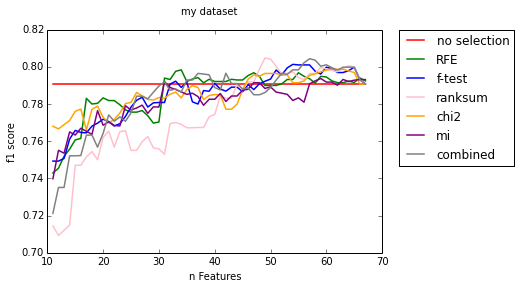

In [17]:
start, end = 1, 68
x_axis = np.arange(start, end)

start= 10
end = 67

plt.plot(x_axis[start:end],m_noselection[start:end], color="red", linewidth=1.5, linestyle="-", label="no selection")
plt.plot(x_axis[start:end],m_RFE[start:end], color="green", linewidth=1.5, linestyle="-", label="RFE") 
plt.plot(x_axis[start:end],m_ftest[start:end], color="blue", linewidth=1.5, linestyle="-", label="f-test") 
plt.plot(x_axis[start:end],m_ranksum[start:end], color="pink", linewidth=1.5, linestyle="-", label="ranksum") 
plt.plot(x_axis[start:end],m_chi[start:end], color="orange", linewidth=1.5, linestyle="-", label="chi2") 
plt.plot(x_axis[start:end],m_mi[start:end], color="purple", linewidth=1.5, linestyle="-", label="mi") 
plt.plot(x_axis[start:end],m_combined[start:end], color="grey", linewidth=1.5, linestyle="-", label="combined") 
#plt.legend(loc='upper left', frameon=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle("my dataset")
plt.xlabel('n Features')
plt.ylabel('f1 score')
plt.show()


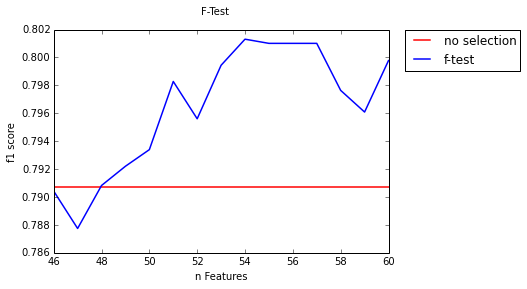

In [13]:
plt.plot(x_axis[start:end],m_noselection[start:end], color="red", linewidth=1.5, linestyle="-", label="no selection")
plt.plot(x_axis[start:end],m_ftest[start:end], color="blue", linewidth=1.5, linestyle="-", label="f-test") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle("F-Test")
plt.xlabel('n Features')
plt.ylabel('f1 score')
plt.show()

In [ ]:
plt.plot(x_axis[start:end],m_noselection[start:end], color="red", linewidth=1.5, linestyle="-", label="no selection")
plt.plot(x_axis[start:end],m_ranksum[start:end], color="pink", linewidth=1.5, linestyle="-", label="ranksum") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle("Ranksum")
plt.xlabel('n Features')
plt.ylabel('f1 score')
plt.show()

In [ ]:
plt.plot(x_axis[start:end],m_noselection[start:end], color="red", linewidth=1.5, linestyle="-", label="no selection")
plt.plot(x_axis[start:end],m_chi[start:end], color="orange", linewidth=1.5, linestyle="-", label="chi2") 
plt.plot(x_axis[start:end],m_mi[start:end], color="purple", linewidth=1.5, linestyle="-", label="mi") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle("Chi2 Mi")
plt.xlabel('n Features')
plt.ylabel('f1 score')
plt.show()

In [ ]:
plt.plot(x_axis[start:end],m_noselection[start:end], color="red", linewidth=1.5, linestyle="-", label="no selection")
plt.plot(x_axis[start:end],m_RFE[start:end], color="green", linewidth=1.5, linestyle="-", label="RFE")  
plt.plot(x_axis[start:end],m_combined[start:end], color="grey", linewidth=1.5, linestyle="-", label="combined") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle("RFE, combined")
plt.xlabel('n Features')
plt.ylabel('f1 score')
plt.show()

In [ ]:
start, end = 35, 39
plt.plot(x_axis[start:end],m_noselection[start:end], color="red", linewidth=1.5, linestyle="-", label="no selection")
plt.plot(x_axis[start:end],m_RFE[start:end], color="green", linewidth=1.5, linestyle="-", label="RFE") 
plt.plot(x_axis[start:end],m_ftest[start:end], color="blue", linewidth=1.5, linestyle="-", label="f-test") 
plt.plot(x_axis[start:end],m_ranksum[start:end], color="pink", linewidth=1.5, linestyle="-", label="ranksum") 
plt.plot(x_axis[start:end],m_chi[start:end], color="orange", linewidth=1.5, linestyle="-", label="chi2") 
plt.plot(x_axis[start:end],m_mi[start:end], color="purple", linewidth=1.5, linestyle="-", label="mi") 
plt.plot(x_axis[start:end],m_combined[start:end], color="grey", linewidth=1.5, linestyle="-", label="combined") 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle("n 15 - 55")
plt.xlabel('n Features')
plt.ylabel('f1 score')
plt.show()

In [ ]:
m_RFE[44]

In [ ]:
m_combined[36]

In [ ]:
m_combined[56]

In [ ]:
m_ranksum[48]

In [ ]:
len(c_dataset["target"])